<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Singapore HDB Resale Price Predictions

--- 
**Primary Learning Objectives:**
1. Creating and iteratively refining a regression model
2. Using [Kaggle](https://www.kaggle.com/) to practice the modeling process
3. Providing business insights through reporting and presentation.

---

## Contents:
- [Kaggle Submission](#Kaggle_Submission)

In [1]:
import dill
import pandas as pd
import numpy as np

from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, PolynomialFeatures
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge
from IPython import display

## Data and Model Import

In [2]:
# load test dataset
test_df = pd.read_csv('../datasets/test.csv', index_col='id')

/var/folders/qd/bsjdfyz95kd_gl4thk_2jhx80000gn/T/ipykernel_55050/3061335787.py:2: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv('../datasets/test.csv', index_col='id')


In [3]:
# preprocessing steps for test dataset
# lower case all column names
test_df.columns=test_df.columns.str.strip().str.lower() 

# impute missing values for hawker_within_2km
test_df['hawker_within_2km'].fillna(0, inplace=True)

In [4]:
# import production model
model_production = dill.load(open('../models/model_production.sav', 'rb'))

## Predictions Generation and Export

In [5]:
# make predictions
y_pred = model_production.predict(test_df)

In [6]:
df=pd.DataFrame()

In [7]:
df['id']=test_df.index.to_series()

In [8]:
df['Predicted']=y_pred

In [9]:
df.head()

,id,Predicted
id,,
114982,114982,355367.278391
95653,95653,487822.488777
40303,40303,372084.810691
109506,109506,227914.229613
100149,100149,450757.545796


In [10]:
df.isnull().sum()

id           0
Predicted    0
dtype: int64

In [11]:
#export predictions in submission format
df.to_csv('../datasets/submission_010323.csv', index=False)

## Kaggle Submission

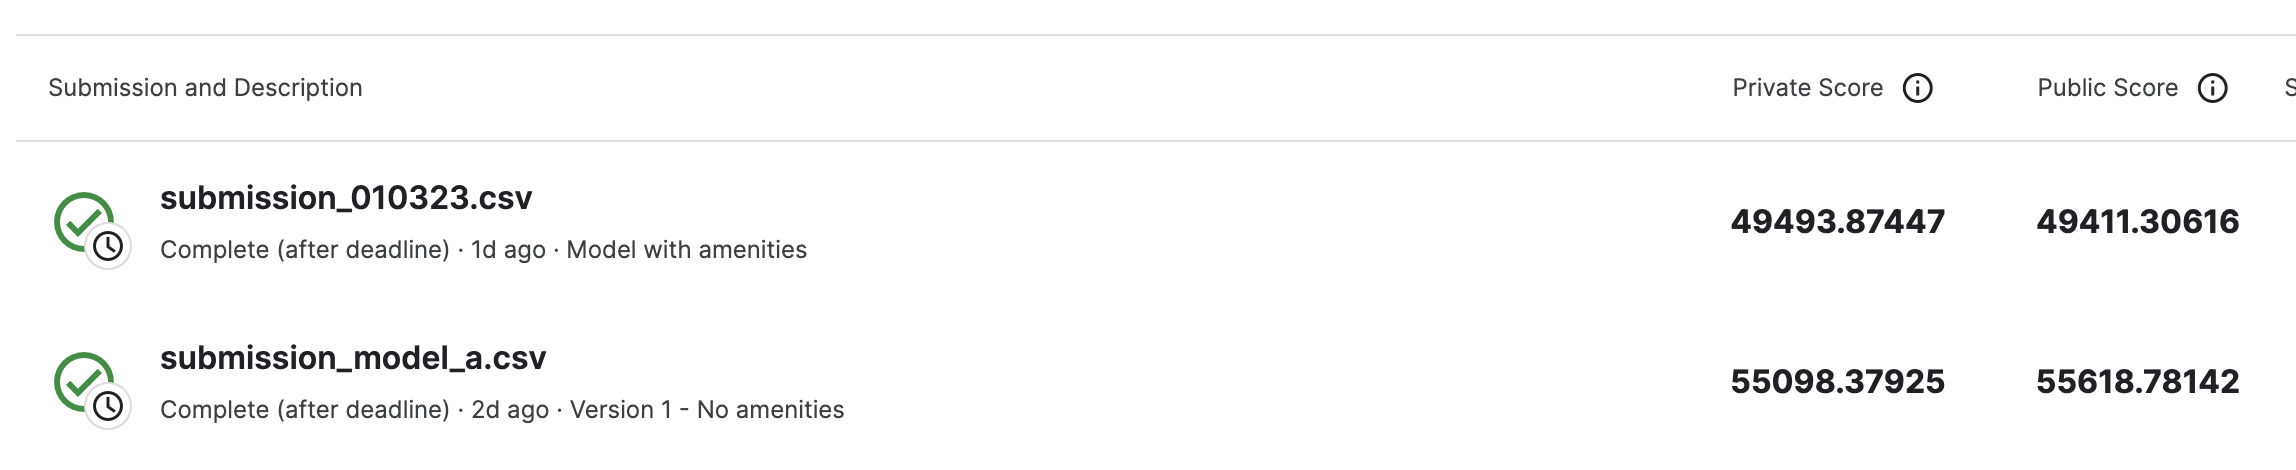

In [12]:
display.Image("../images/Kaggle_score.png")